In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


![](https://media.istockphoto.com/illustrations/brain-with-stroke-illustration-id167588136?k=20&m=167588136&s=612x612&w=0&h=EF3_xj0BKuMOKTexjwJCDXr_kWYwU2dULs-OkeUcyg8=)

1. id: unique identifier
1. gender: "Male", "Female" or "Other"
1. age: age of the patient
1. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
1. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
1. ever_married: "No" or "Yes"
1. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
1. Residence_type: "Rural" or "Urban"
1. avg_glucose_level: average glucose level in blood
1.  bmi: body mass index
1.  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
1.  stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data = data.drop('id',axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
data.shape

(5110, 11)

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
import missingno as msno

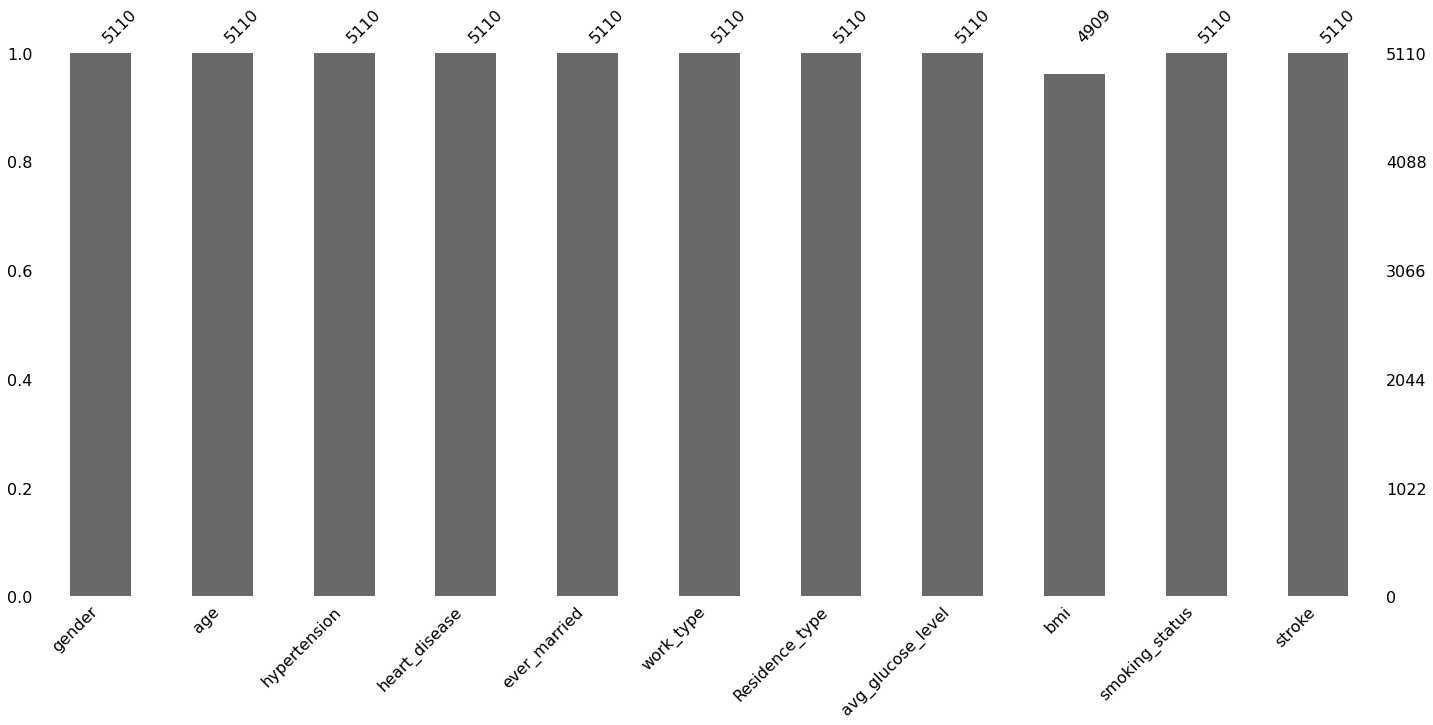

In [12]:
msno.bar(data)
plt.show()

In [13]:
data.isnull().mean() * 100 # Check in percentages of missing values.

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [14]:
data = data.dropna(subset=['bmi'])

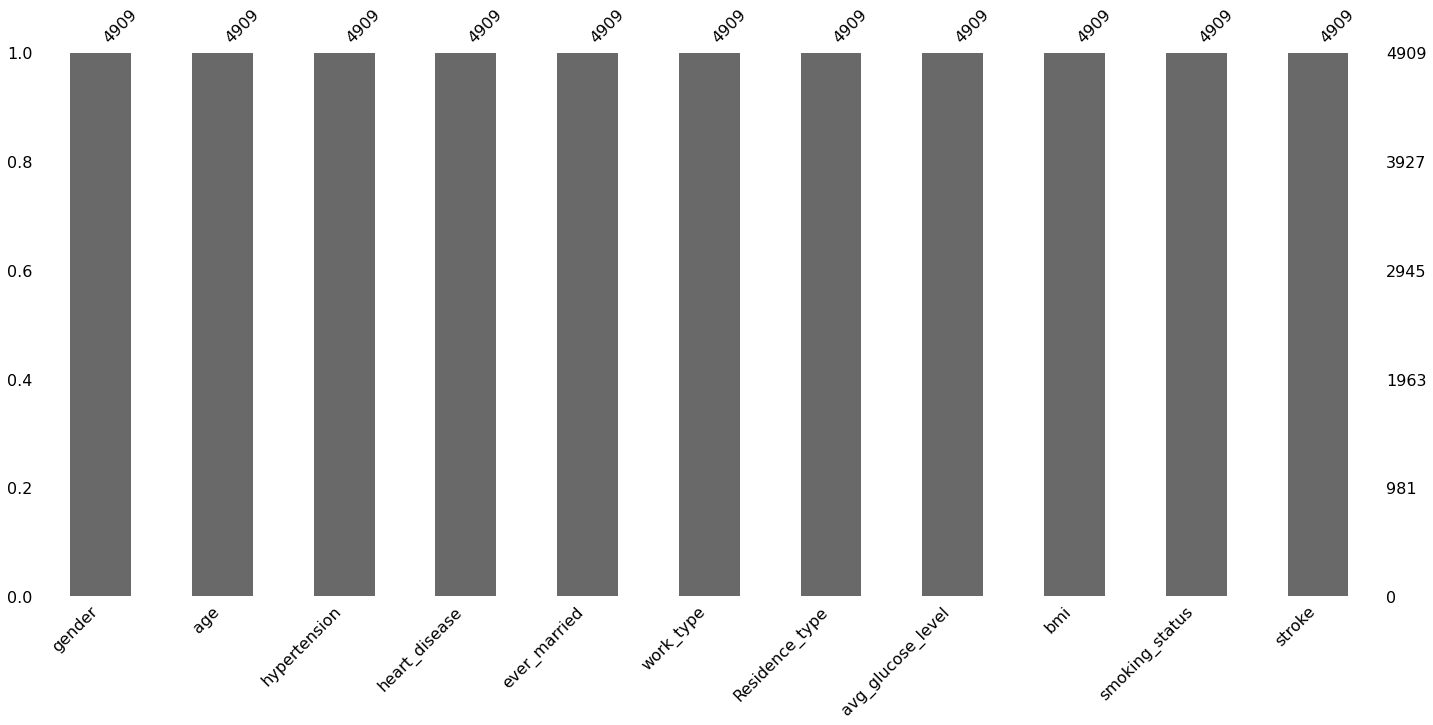

In [15]:
msno.bar(data)
plt.show()

# EDA

In [16]:
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


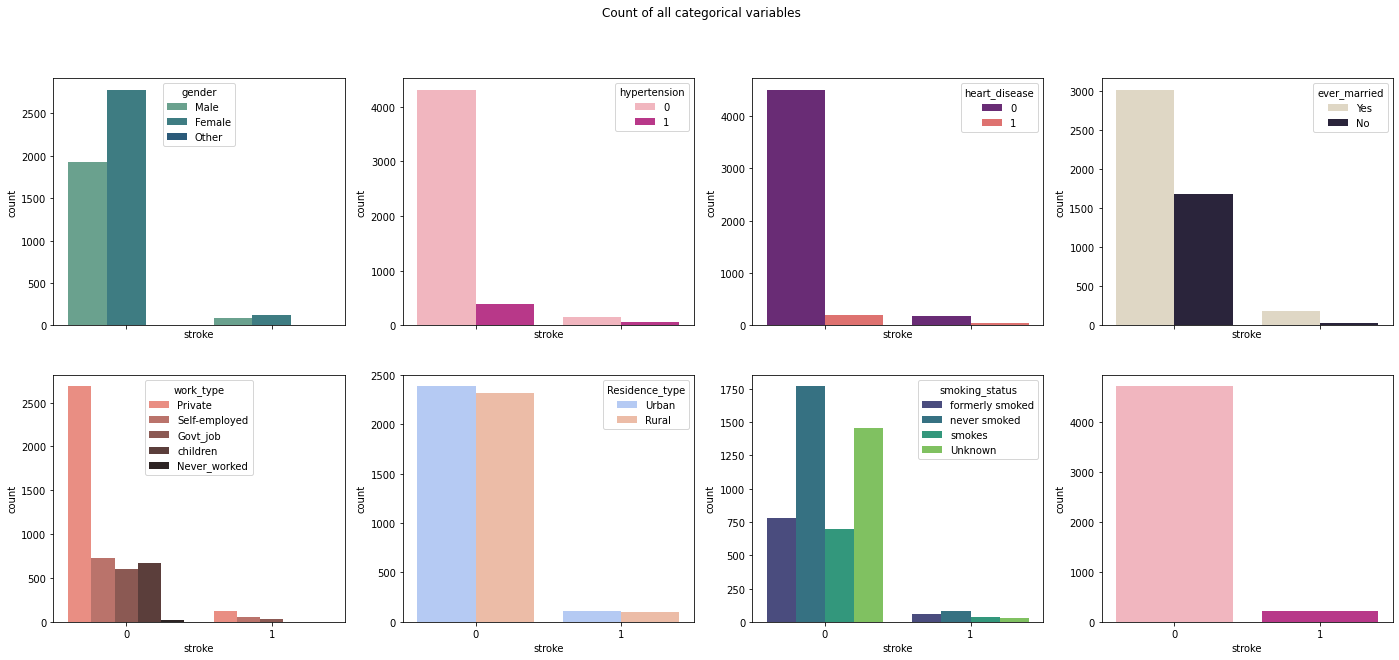

In [17]:
fig, axes = plt.subplots(2, 4, sharex=True, figsize=(24,10))
fig.suptitle('Count of all categorical variables')
sns.countplot(ax=axes[0, 0], data=data, x='stroke',hue = 'gender',palette='crest')
sns.countplot(ax=axes[0, 1], data=data, x='stroke',hue='hypertension',palette='RdPu')
sns.countplot(ax=axes[0, 2], data=data, x='stroke',hue = 'heart_disease',palette='magma')
sns.countplot(ax=axes[0, 3], data=data, x='stroke',hue = 'ever_married',palette="ch:s=-.2,r=.6")
sns.countplot(ax=axes[1,0],data = data, x ='stroke' ,hue = 'work_type',palette="dark:salmon_r")
sns.countplot(ax=axes[1,1],data = data, x ='stroke',hue='Residence_type',palette="coolwarm" )
sns.countplot(ax=axes[1,2],data = data, x ='stroke',hue='smoking_status',palette='viridis' )
sns.countplot(ax=axes[1,3],data = data, x ='stroke',palette='RdPu' )
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


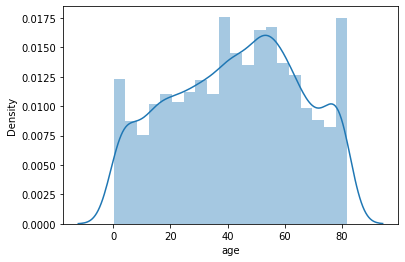

In [18]:
sns.distplot(data['age'])
plt.show()

# Apply the label encoding for categorical columns

In [19]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()

In [20]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [21]:
LABEL_ENCODING("gender")
LABEL_ENCODING("ever_married")
LABEL_ENCODING("work_type")
LABEL_ENCODING("Residence_type")
LABEL_ENCODING("smoking_status")
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


# Import the independent and dependent variable.

In [22]:
x = data.drop('stroke',axis=1)
y = data['stroke']

In [23]:
print(x.shape)
print(y.shape)

(4909, 10)
(4909,)


# Feature Selection

# Apply SelectKBest Algorithm

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
ordered_rank_features = SelectKBest(score_func=chi2,k=10)
ordered_feature = ordered_rank_features.fit(x,y)

In [26]:
dfscores = pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(x.columns)

In [27]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,gender,0.132460
1,age,3144.139535
2,hypertension,90.543821
3,heart_disease,88.779204
4,ever_married,18.829557
5,work_type,3.076416
6,Residence_type,0.087999
7,avg_glucose_level,1775.520314
8,bmi,18.814363
9,smoking_status,10.805693


# Take top 10 features variables.

In [28]:
features_rank.nlargest(10,'Score')

,Features,Score
1,age,3144.139535
7,avg_glucose_level,1775.520314
2,hypertension,90.543821
3,heart_disease,88.779204
4,ever_married,18.829557
8,bmi,18.814363
9,smoking_status,10.805693
5,work_type,3.076416
0,gender,0.132460
6,Residence_type,0.087999


**Here is features are only 10 so take it all for model, Feature selection is not use full for this model**

# Split the dataset into train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3681, 10)
(1228, 10)
(3681,)
(1228,)


# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[ 1.20175958,  1.11851407, -0.31171847, ...,  2.89959227,
         1.71949811,  0.59276308],
       [ 1.20175958,  1.07417662,  3.20802292, ...,  3.36558267,
         0.27065544,  0.59276308],
       [ 1.20175958,  1.7392384 , -0.31171847, ...,  0.89418939,
        -0.31396528,  1.53407494],
       ...,
       [ 1.20175958, -0.83233382,  3.20802292, ..., -0.5533313 ,
        -0.08520065,  1.53407494],
       [ 1.20175958, -1.49739561, -0.31171847, ...,  0.84418946,
        -0.56814821, -1.28986064],
       [ 1.20175958,  0.67513955, -0.31171847, ..., -0.80986251,
        -0.16145553,  0.59276308]])

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.9600977198697068


# SVM

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the tset set result

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[1179    0]
 [  49    0]]


In [40]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9600977198697068


# Training the K-NN model on the Training set

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
acc3 = accuracy_score(y_test, y_pred)

In [43]:
print(f"Accuracy score: {acc3}")

Accuracy score: 0.9600977198697068


# Training the Naive Bayes on the Training set

In [44]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
acc4 = accuracy_score(y_test, y_pred)

In [47]:
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8705211726384365


# Training Decision Tree Classification on Train set

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.9218241042345277


# Create visualization for all model with their Accuracy

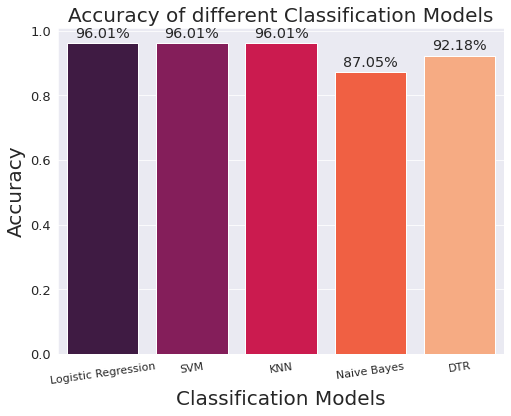

In [51]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Applying k-Fold Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.61 %
Standard Deviation: 0.38 %


![](https://static.wingify.com/gcp/uploads/sites/3/2021/01/Feature-image_7-Thank-You-Page-Examples-That-Can-Boost-Visitor-Experience.png)